# Conditional Probability:

Conditional probability is defined as the likelihood of an event or outcome occurring, based on the occurrence of a previous event or outcome.

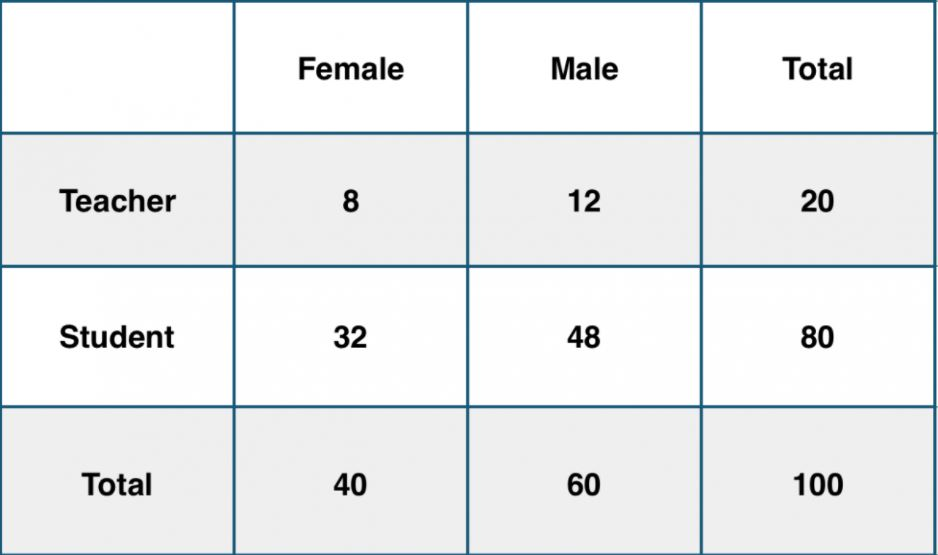

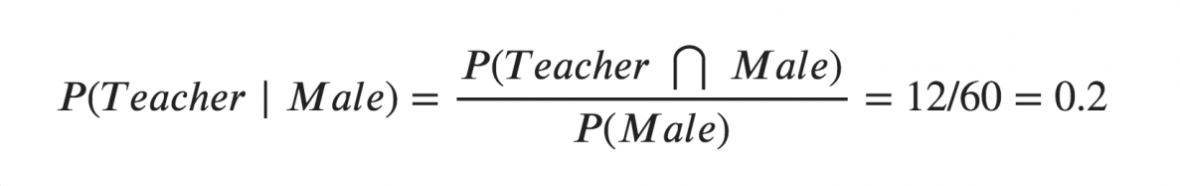

# Naive bayes Classifier:

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.


P(class | data) = P(data | class) * P(class)

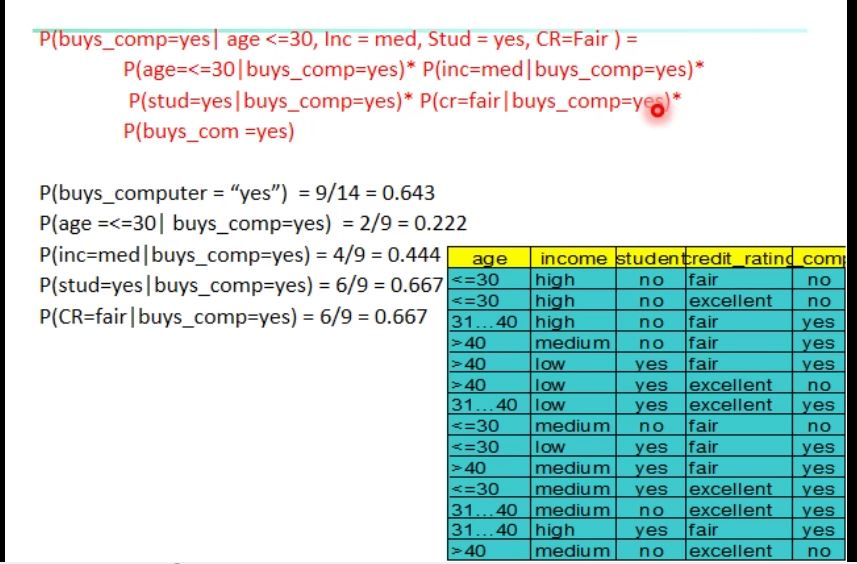

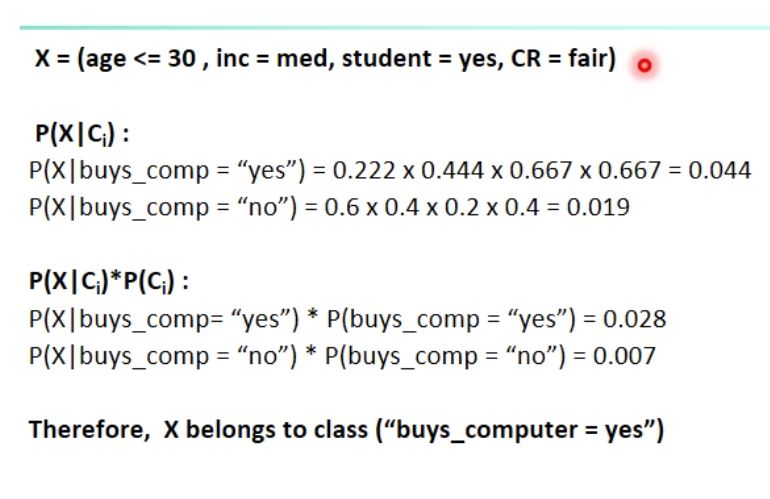

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import warnings

warnings.filterwarnings("ignore")
sns.set()

In [105]:
df = pd.read_csv('/content/titanic.csv')

*   Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   Survival (0 = No; 1 = Yes)
*   Name
*   Sibsp: Number of Siblings/Spouses Aboard
*   Age
*   Sex
*   Parch: Number of Parents/Children Aboard
*   Fare: Passenger Fare (British pound)
*   Embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)









In [106]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# Null Values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
df.shape

(891, 11)

In [109]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

29.69911764705882
28.0
0    24.0
dtype: float64


In [113]:
# Imputation

df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna('S',inplace=True)

In [114]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

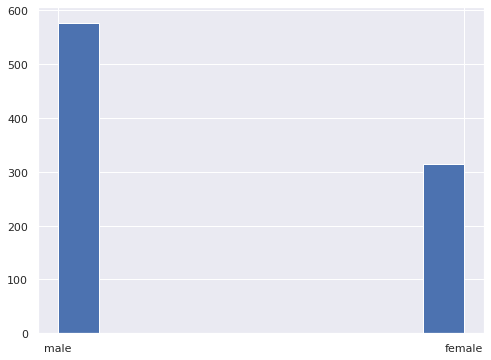

In [115]:
plt.figure(figsize=(8,6))
plt.hist(df['Sex'])
plt.show()

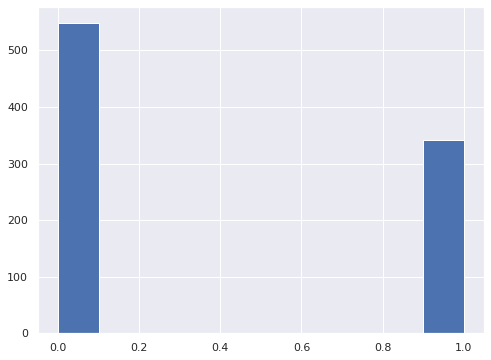

In [116]:
plt.figure(figsize=(8,6))
plt.hist(df['Survived'])
plt.show()

# Model Building

In [117]:
X = df.drop(['Survived','Cabin','Ticket','PassengerId'],axis=1)
y= df['Survived']

In [118]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [119]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [120]:
X['Sex'] = X['Sex'].replace(["female", "male"], [0, 1])
X['Embarked'] = X['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

In [121]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,28.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,2


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [124]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
naive_model.score(X_test, y_test)

0.7723880597014925

#### Naive Bayes are faster to train and predict than other model and its training procedure is easy to understand.

## Resources:

Articles:

https://machinelearningmastery.com/bayes-theorem-for-machine-learning/

https://machinelearningmastery.com/naive-bayes-for-machine-learning/

Video:
https://www.youtube.com/watch?v=O2L2Uv9pdDA&t=24s

Josh Starmer

Book:

Introduction to Machine Learning, Andreas Muller